# **Keras**
## Fully Connected Neural Networks
- All you need to know

In [22]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### First check if GPU is active:

In [23]:
import tensorflow as tf

In [24]:
tf.test.is_built_with_gpu_support()

True

In [25]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [26]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),#32 neurons in the first layer,  25*25=784
    Activation('relu'),
    Dense(10), #output layer, 10 classes for ouput
    Activation('softmax'),
])

### Dense: fully connceted network

- Our input pictures are $28 \times 28$ which is $784$ features

- We have 32 neurons in the first layer

- We have to have 10 neurons in the output layer because we have 10 classes (digits from 0 to 9)

- Activation function for the last layer is 'softmax'

### Different ways to define the model:

In [29]:
# or
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

In [30]:
# or
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])

In [31]:
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [32]:
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

### 'adam':
- is the optimizer 

### 'accuracy': 
 - gives the percentage of correct prediction
 
### 'categorical_crossentropy':
 - crossentropy loss for multiclass classification when y in converted to vector
 
 
### 'SparseCategoricalCrossentropy':
 - crossentropy loss between the labels and predictions.
 - No need to convert y to vector
 
for more infro about loss functions: https://www.tensorflow.org/api_docs/python/tf/keras/losses

In [33]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                25120     
_________________________________________________________________
activation_8 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


### In the Input layer: 
- We have $28 \times 28$ pixel images which is $784$ features

### In the first hidden layer:
- We have  $32$ neurons and each neuron is connected with $784$ wights and $1$ bias:  $785 \times 32$ which is  $25120$

### In the output layer:
- We have  $10$ neurons each neuron is connected  with$32$ wights and $1$ bias:  $33 \times 10$ which is  $330$


In [34]:
from keras.datasets import mnist
import keras

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [35]:
X_train[0].shape

(28, 28)

In [36]:
X_train = X_train.reshape(60000, 784) # X_train is going to be fed into Dense layer so it must be flaten from 25*25 to 784
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 #normalizing 
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [37]:
type(X_train)

numpy.ndarray

## Normalizing
- All data should be in range 0 to 1
- Value of each pixel is between 0 to 255 so deviding by 255 normalize all pixels

### If there is any error loading the next cell, restart the kernel and run this cell first
`import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("physical_devices-------------", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)`

In [38]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.5076 - accuracy: 0.8607
Epoch 2/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.2486 - accuracy: 0.9299
Epoch 3/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.2029 - accuracy: 0.9433
Epoch 4/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.1733 - accuracy: 0.9506 
Epoch 5/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.1519 - accuracy: 0.9570
Epoch 6/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.1359 - accuracy: 0.9613
Epoch 7/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.1232 - accuracy: 0.9646
Epoch 8/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.1152 - accuracy: 0.9665
Epoch 9/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.1070 - accuracy: 0.9694
Epoch 10/10
60000/60000 [=============================

### Now we want to split the train data for crossvalidation:

In [39]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 34us/step - loss: 0.0956 - accuracy: 0.9721 - val_loss: 0.0783 - val_accuracy: 0.9780
Epoch 2/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.0900 - accuracy: 0.9733 - val_loss: 0.0788 - val_accuracy: 0.9778
Epoch 3/10
54000/54000 [==============================] - 2s 30us/step - loss: 0.0856 - accuracy: 0.9749 - val_loss: 0.0795 - val_accuracy: 0.9773
Epoch 4/10
54000/54000 [==============================] - 2s 33us/step - loss: 0.0818 - accuracy: 0.9757 - val_loss: 0.0815 - val_accuracy: 0.9763
Epoch 5/10
54000/54000 [==============================] - 3s 64us/step - loss: 0.0768 - accuracy: 0.9771 - val_loss: 0.0839 - val_accuracy: 0.9762
Epoch 6/10
54000/54000 [==============================] - 3s 57us/step - loss: 0.0738 - accuracy: 0.9776 - val_loss: 0.0901 - val_accuracy: 0.9728
Epoch 7/10
54000/54000 [==============================] - 2s 45us/ste

In [40]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.115
Test Accuracy: 0.965


### Score
`score[0]` is Loss

`score[1]` is Accuracy

In [41]:
# recreating the model seems the only way to reset?
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

### If you don't redefine the model and run the fit() command, it would be considered as the next 10 epochs.

In [26]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 48us/step - loss: 0.5472 - accuracy: 0.8474 - val_loss: 0.2461 - val_accuracy: 0.9333
Epoch 2/10
54000/54000 [==============================] - 2s 45us/step - loss: 0.2665 - accuracy: 0.9239 - val_loss: 0.1911 - val_accuracy: 0.9502
Epoch 3/10
54000/54000 [==============================] - 3s 49us/step - loss: 0.2119 - accuracy: 0.9397 - val_loss: 0.1593 - val_accuracy: 0.9567
Epoch 4/10
54000/54000 [==============================] - 3s 47us/step - loss: 0.1811 - accuracy: 0.9475 - val_loss: 0.1435 - val_accuracy: 0.9615
Epoch 5/10
54000/54000 [==============================] - 3s 49us/step - loss: 0.1598 - accuracy: 0.9542 - val_loss: 0.1305 - val_accuracy: 0.9632
Epoch 6/10
54000/54000 [==============================] - 3s 49us/step - loss: 0.1437 - accuracy: 0.9588 - val_loss: 0.1261 - val_accuracy: 0.9657
Epoch 7/10
54000/54000 [==============================] - 3s 48us/ste

### Now we want to store the model result into `history_callback`

In [42]:
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 2s 36us/step - loss: 0.5461 - accuracy: 0.8500 - val_loss: 0.2400 - val_accuracy: 0.9345
Epoch 2/100
54000/54000 [==============================] - 2s 39us/step - loss: 0.2648 - accuracy: 0.9253 - val_loss: 0.1988 - val_accuracy: 0.9430
Epoch 3/100
54000/54000 [==============================] - 2s 33us/step - loss: 0.2184 - accuracy: 0.9386 - val_loss: 0.1670 - val_accuracy: 0.9543
Epoch 4/100
54000/54000 [==============================] - 2s 34us/step - loss: 0.1879 - accuracy: 0.9468 - val_loss: 0.1509 - val_accuracy: 0.9600
Epoch 5/100
54000/54000 [==============================] - 2s 34us/step - loss: 0.1663 - accuracy: 0.9525 - val_loss: 0.1373 - val_accuracy: 0.9647
Epoch 6/100
54000/54000 [==============================] - 2s 35us/step - loss: 0.1501 - accuracy: 0.9569 - val_loss: 0.1323 - val_accuracy: 0.9613
Epoch 7/100
54000/54000 [==============================] - 2s 3

Epoch 56/100
54000/54000 [==============================] - 2s 30us/step - loss: 0.0160 - accuracy: 0.9964 - val_loss: 0.1482 - val_accuracy: 0.9690
Epoch 57/100
54000/54000 [==============================] - 2s 30us/step - loss: 0.0158 - accuracy: 0.9964 - val_loss: 0.1492 - val_accuracy: 0.9677
Epoch 58/100
54000/54000 [==============================] - 2s 30us/step - loss: 0.0151 - accuracy: 0.9969 - val_loss: 0.1558 - val_accuracy: 0.9660
Epoch 59/100
54000/54000 [==============================] - 2s 30us/step - loss: 0.0142 - accuracy: 0.9969 - val_loss: 0.1532 - val_accuracy: 0.9677
Epoch 60/100
54000/54000 [==============================] - 2s 33us/step - loss: 0.0134 - accuracy: 0.9974 - val_loss: 0.1573 - val_accuracy: 0.9677
Epoch 61/100
54000/54000 [==============================] - 2s 32us/step - loss: 0.0134 - accuracy: 0.9974 - val_loss: 0.1584 - val_accuracy: 0.9680
Epoch 62/100
54000/54000 [==============================] - 2s 31us/step - loss: 0.0130 - accuracy: 0.9972

### In the cell above we set `epochs=100` for better plotting

In [43]:
pd.DataFrame(history_callback.history)

,val_loss,val_accuracy,loss,accuracy
0,0.239991,0.934500,0.546067,0.850019
1,0.198808,0.943000,0.264772,0.925333
2,0.166996,0.954333,0.218398,0.938556
3,0.150858,0.960000,0.187864,0.946796
4,0.137324,0.964667,0.166327,0.952537
...,...,...,...,...
95,0.205994,0.967000,0.003230,0.999759
96,0.209578,0.966500,0.002407,0.999981
97,0.219787,0.964833,0.002734,0.999852
98,0.214039,0.966667,0.004239,0.999296


In [44]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

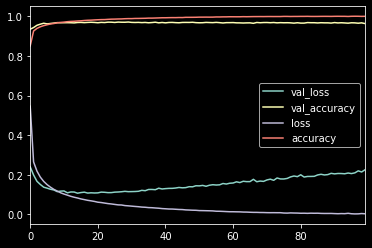

In [45]:
pd.DataFrame(history_callback.history).plot()

Text(0, 0.5, 'loss')

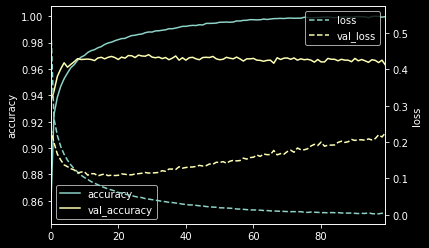

In [46]:
df = pd.DataFrame(history_callback.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

### In the plot above:
- The accuracy for validation set is stabalized after 20 epochs

- The loss for validation set increases as the number of epochs increases, shows *Overfitting*

### Using Keras inside SKlearn:

- Use `GridsearchCV` to find the best parameters


In [34]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

def make_model(optimizer="adam", hidden_size=32):
    model = Sequential([
        Dense(hidden_size, input_shape=(784,)),
        Activation('relu'),
        Dense(10),
        Activation('softmax'),
    ])
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)

param_grid = {'epochs': [1, 5, 10],  # epochs is fit parameter, not in make_model!
              'hidden_size': [32, 64, 256]}

grid = GridSearchCV(clf, param_grid=param_grid,return_train_score=True)

In [35]:
grid.fit(X_train, y_train)

Epoch 1/1
48000/48000 [==============================] - 3s 73us/step
Epoch 1/1
48000/48000 [==============================] - 4s 76us/step
Epoch 1/1
48000/48000 [==============================] - 3s 73us/step
Epoch 1/1
48000/48000 [==============================] - 4s 81us/step
Epoch 1/1
48000/48000 [==============================] - 4s 74us/step
Epoch 1/1
48000/48000 [==============================] - 4s 81us/step
Epoch 1/1
48000/48000 [==============================] - 5s 96us/step
Epoch 1/1
48000/48000 [==============================] - 4s 77us/step
Epoch 1/1
48000/48000 [==============================] - 4s 78us/step
Epoch 1/1
48000/48000 [==============================] - 3s 72us/step
Epoch 1/1
48000/48000 [==============================] - 4s 80us/step
Epoch 1/1
48000/48000 [==============================] - 4s 93us/step
Epoch 1/1
48000/48000 [==============================] - 4s 86us/step
Epoch 1/1
48000/48000 [==============================] - 4s 86us/step
Epoch 1/1
48000/4800

48000/48000 [==============================] - 8s 166us/step - loss: 0.0805 - accuracy: 0.9759
Epoch 9/10
48000/48000 [==============================] - 8s 156us/step - loss: 0.0750 - accuracy: 0.9764
Epoch 10/10
48000/48000 [==============================] - 3s 64us/step
Epoch 1/10
48000/48000 [==============================] - 7s 147us/step - loss: 0.3814 - accuracy: 0.8935
Epoch 2/10
48000/48000 [==============================] - 8s 161us/step - loss: 0.1961 - accuracy: 0.9439
Epoch 3/10
48000/48000 [==============================] - 8s 164us/step - loss: 0.1551 - accuracy: 0.9549
Epoch 4/10
48000/48000 [==============================] - 8s 161us/step - loss: 0.1319 - accuracy: 0.9609
Epoch 5/10
48000/48000 [==============================] - 8s 157us/step - loss: 0.1146 - accuracy: 0.9658
Epoch 6/10
48000/48000 [==============================] - 7s 148us/step - loss: 0.1016 - accuracy: 0.9700
Epoch 7/10
48000/48000 [==============================] - 7s 140us/step - loss: 0.0916 - ac

48000/48000 [==============================] - 9s 187us/step - loss: 0.0518 - accuracy: 0.9846
Epoch 8/10
48000/48000 [==============================] - 9s 186us/step - loss: 0.0429 - accuracy: 0.9871
Epoch 9/10
48000/48000 [==============================] - 9s 187us/step - loss: 0.0371 - accuracy: 0.9890
Epoch 10/10
48000/48000 [==============================] - 3s 68us/step
Epoch 1/10
48000/48000 [==============================] - 21s 444us/step - loss: 0.2490 - accuracy: 0.9280
Epoch 2/10
48000/48000 [==============================] - 21s 439us/step - loss: 0.1021 - accuracy: 0.9694
Epoch 3/10
48000/48000 [==============================] - 21s 439us/step - loss: 0.0682 - accuracy: 0.9785
Epoch 4/10
48000/48000 [==============================] - 21s 439us/step - loss: 0.0461 - accuracy: 0.9860
Epoch 5/10
48000/48000 [==============================] - 21s 438us/step - loss: 0.0351 - accuracy: 0.9888
Epoch 6/10
48000/48000 [==============================] - 21s 439us/step - loss: 0.025

GridSearchCV(cv=None, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000025BA4EC1B08>,
             iid='deprecated', n_jobs=None,
             param_grid={'epochs': [1, 5, 10], 'hidden_size': [32, 64, 256]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [47]:
res = pd.DataFrame(grid.cv_results_)

In [48]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_epochs,param_hidden_size,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.025750,0.121604,0.934897,0.037494,1,32,"{'epochs': 1, 'hidden_size': 32}",0.934583,0.927500,0.924250,...,0.927917,0.005626,9,0.934104,0.933875,0.933500,0.929271,0.935854,0.933321,0.002181
1,6.387165,0.401532,0.966152,0.067356,1,64,"{'epochs': 1, 'hidden_size': 64}",0.946500,0.939333,0.930917,...,0.940100,0.006106,8,0.951604,0.949083,0.939854,0.948042,0.947312,0.947179,0.003940
2,6.337506,0.451046,0.960214,0.062294,1,256,"{'epochs': 1, 'hidden_size': 256}",0.962167,0.956917,0.956917,...,0.957833,0.003924,6,0.968125,0.966542,0.967917,0.967021,0.967229,0.967367,0.000583
3,26.587724,2.333972,0.835366,0.092323,5,32,"{'epochs': 5, 'hidden_size': 32}",0.960167,0.955583,0.958167,...,0.956867,0.003196,7,0.970750,0.970167,0.971646,0.969063,0.967354,0.969796,0.001481
4,25.592521,1.697408,0.866651,0.097582,5,64,"{'epochs': 5, 'hidden_size': 64}",0.968750,0.966833,0.970250,...,0.967600,0.002433,4,0.981917,0.984021,0.984521,0.981542,0.983250,0.983050,0.001158
5,28.306518,1.612541,0.947189,0.089548,5,256,"{'epochs': 5, 'hidden_size': 256}",0.973833,0.974083,0.973917,...,0.974033,0.001850,2,0.992521,0.992562,0.992396,0.992688,0.994083,0.992850,0.000624
6,50.026700,0.648113,0.830380,0.012044,10,32,"{'epochs': 10, 'hidden_size': 32}",0.964917,0.960500,0.956833,...,0.960917,0.002672,5,0.979625,0.981958,0.978562,0.985229,0.979500,0.980975,0.002403
7,49.753013,0.768863,0.835367,0.028256,10,64,"{'epochs': 10, 'hidden_size': 64}",0.969500,0.969750,0.971083,...,0.969783,0.002038,3,0.993333,0.992500,0.993917,0.993625,0.992375,0.993150,0.000612
8,52.003170,0.490206,0.842732,0.040182,10,256,"{'epochs': 10, 'hidden_size': 256}",0.978167,0.976333,0.976667,...,0.976817,0.001747,1,0.997563,0.996896,0.996542,0.996562,0.998417,0.997196,0.000713


In [49]:
res.pivot_table(index=["param_epochs", "param_hidden_size"],
                values=['mean_train_score', "mean_test_score"])

mean_test_score  mean_train_score
param_epochs param_hidden_size                                   
1            32                        0.927917          0.933321
             64                        0.940100          0.947179
             256                       0.957833          0.967367
5            32                        0.956867          0.969796
             64                        0.967600          0.983050
             256                       0.974033          0.992850
10           32                        0.960917          0.980975
             64                        0.969783          0.993150
             256                       0.976817          0.997196

In [50]:
grid.score(X_test, y_test)

10000/10000 [==============================] - 1s 73us/step


0.9793999791145325

### Let's create a more advanced model:

- 2 hidden layers

- Each layer has 1024 neurons

In [47]:
model = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128,
                    epochs=20, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 4s 82us/step - loss: 0.2036 - accuracy: 0.9391 - val_loss: 0.1004 - val_accuracy: 0.9703
Epoch 2/20
54000/54000 [==============================] - 4s 76us/step - loss: 0.0769 - accuracy: 0.9755 - val_loss: 0.0731 - val_accuracy: 0.9782
Epoch 3/20
54000/54000 [==============================] - 4s 76us/step - loss: 0.0473 - accuracy: 0.9846 - val_loss: 0.0717 - val_accuracy: 0.9783
Epoch 4/20
54000/54000 [==============================] - 4s 78us/step - loss: 0.0350 - accuracy: 0.9886 - val_loss: 0.0723 - val_accuracy: 0.9812
Epoch 5/20
54000/54000 [==============================] - 4s 77us/step - loss: 0.0246 - accuracy: 0.9920 - val_loss: 0.0901 - val_accuracy: 0.9758
Epoch 6/20
54000/54000 [==============================] - 4s 77us/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0784 - val_accuracy: 0.9807
Epoch 7/20
54000/54000 [==============================] - 5s 89us/ste

In [39]:
score = model.evaluate(X_test, y_test, verbose=0)

In [40]:
score

[0.10338941164854659, 0.9811000227928162]

In [41]:
model.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dense_105 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_106 (Dense)            (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'loss')

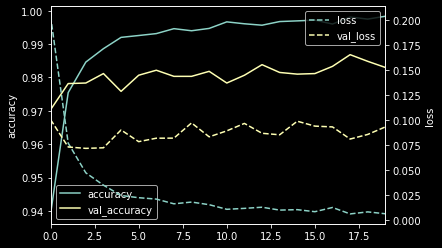

In [49]:
df = pd.DataFrame(history.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

### As you can see in plot above,  `val_loss` start to increase very early (around epoch=1) which shows *overfitting*

- The model is very complex

### Dropout:
- To remove *Overfitting* we use dropout

In [50]:
from keras.layers import Dropout

model_dropout = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dropout(.5),
    Dense(1024, activation='relu'),
    Dropout(.5),
    Dense(10, activation='softmax'),
])
model_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, batch_size=128,
                            epochs=20, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 5s 87us/step - loss: 0.2987 - accuracy: 0.9086 - val_loss: 0.1059 - val_accuracy: 0.9687
Epoch 2/20
54000/54000 [==============================] - 5s 86us/step - loss: 0.1417 - accuracy: 0.9569 - val_loss: 0.0781 - val_accuracy: 0.9763
Epoch 3/20
54000/54000 [==============================] - 4s 83us/step - loss: 0.1095 - accuracy: 0.9660 - val_loss: 0.0674 - val_accuracy: 0.9807
Epoch 4/20
54000/54000 [==============================] - 4s 80us/step - loss: 0.0951 - accuracy: 0.9698 - val_loss: 0.0751 - val_accuracy: 0.9787
Epoch 5/20
54000/54000 [==============================] - 4s 79us/step - loss: 0.0836 - accuracy: 0.9743 - val_loss: 0.0602 - val_accuracy: 0.9822
Epoch 6/20
54000/54000 [==============================] - 4s 79us/step - loss: 0.0728 - accuracy: 0.9774 - val_loss: 0.0627 - val_accuracy: 0.9813
Epoch 7/20
54000/54000 [==============================] - 4s 79us/ste

In [54]:
model_dropout.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'loss')

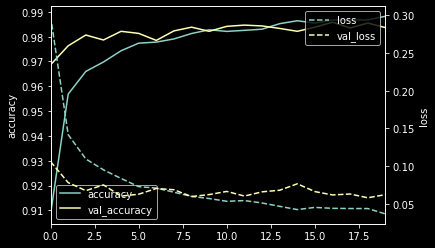

In [55]:
df = pd.DataFrame(history_dropout.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

### As you can see there's no *overfitting* problem anymore

- loss function decreasing constantly

In [56]:
score = model_dropout.evaluate(X_test, y_test, verbose=0)

In [57]:
score

[0.06551973431938476, 0.9836999773979187]

In [58]:
model_dropout.predict(X_test)[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Batch Normalization

In [59]:
from keras.layers import BatchNormalization

model_bn = Sequential([
    Dense(512, input_shape=(784,)),
    BatchNormalization(),
    Activation("relu"),
    Dense(512),
    BatchNormalization(),
    Activation("relu"),
    Dense(10, activation='softmax'),
])
model_bn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])


In [60]:
model_bn.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
activation_14 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
activation_15 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)              

In [61]:
history_bn = model.fit(X_train, y_train, batch_size=128,
                    epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 77us/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.1184 - val_accuracy: 0.9828
Epoch 2/10
54000/54000 [==============================] - 4s 78us/step - loss: 0.0047 - accuracy: 0.9989 - val_loss: 0.1190 - val_accuracy: 0.9828
Epoch 3/10
54000/54000 [==============================] - 4s 75us/step - loss: 0.0137 - accuracy: 0.9964 - val_loss: 0.1211 - val_accuracy: 0.9822
Epoch 4/10
54000/54000 [==============================] - 4s 74us/step - loss: 0.0078 - accuracy: 0.9980 - val_loss: 0.1076 - val_accuracy: 0.9832
Epoch 5/10
54000/54000 [==============================] - 4s 77us/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0995 - val_accuracy: 0.9855
Epoch 6/10
54000/54000 [==============================] - 4s 74us/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.1095 - val_accuracy: 0.9845
Epoch 7/10
54000/54000 [==============================] - 4s 74us/ste

Text(0, 0.5, 'loss')

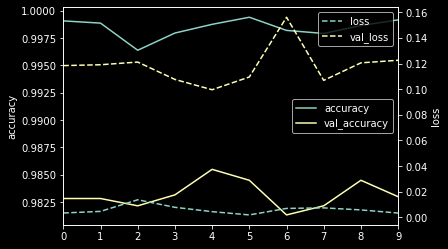

In [62]:
df = pd.DataFrame(history_bn.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")